In [1]:
import pydicom
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 기본
f_dcm = pydicom.dcmread('/home/mount/docker_share/deidentify/test/Exported20200515/image-00000.dcm')

In [3]:
# 컬러 버전 (차원 하나 추가, rgb)
f_dcm = pydicom.dcmread('/home/mount/pacsdata/20090516/E4114421/I00098023405.dcm')

In [4]:
# 개인정보 있는 경우
f_dcm = pydicom.dcmread('/home/mount/pacsdata/20090516/E4114443/I00098024024.dcm')

In [5]:
# f_dcm

In [6]:
print(f'디바이스 시리얼 : {f_dcm.DeviceSerialNumber}')
print(f'이미지 크기 : {f_dcm.pixel_array.shape}')

디바이스 시리얼 : 073-226
이미지 크기 : (1024, 1280)


In [7]:
# 중요 ! 
# 리눅스 conda install gdcm -c conda-forge (리눅스에만 됨)

In [8]:
print(f'GDCM handler 정상 작동 여부 : {pydicom.pixel_data_handlers.gdcm_handler.is_available()}')

GDCM handler 정상 작동 여부 : True


In [9]:
# f_dcm.pixel_array

In [10]:
temp_img = f_dcm.pixel_array

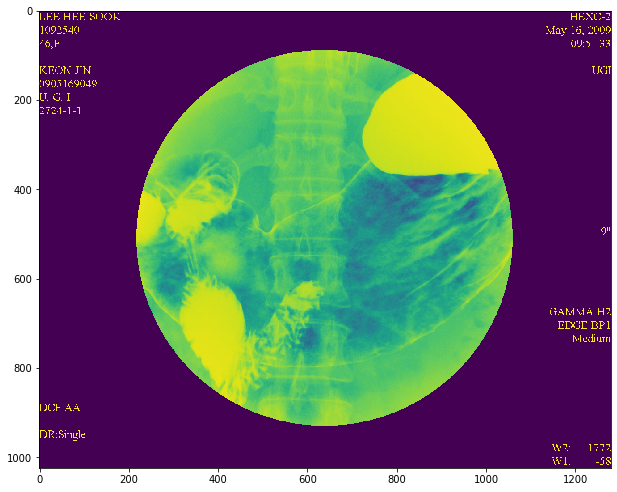

In [11]:
# 이미지 확인
plt.rcParams["figure.figsize"] = (10.24,12.80)
plt.imshow(temp_img)

In [12]:
# 케이스별 필터 위치 지정 (상,하,좌,우)
def case_selector(dcm_file):
    if case_router(dcm_file) == 1 :
        return [
                (100,240,0,200),
                (650,750,1100,1280)
                ]
    else :
        return 999

In [13]:
# 케이스 판별 기준
# 이 코드에서는 장비 시리얼 번호와 이미지 크기를 이용함
def case_router(dcm_file):
    if ((dcm_file.DeviceSerialNumber == '073-226') and (dcm_file.Rows == 1024) and (dcm_file.Columns == 1280) ):
        return 1
    else:
        return 999

In [14]:
# 이미지를 자르는 모듈
def image_cutter(y_start,y_end,x_start,x_end):
    if len(f_dcm.pixel_array.shape) == 3:
        size_x, size_y, _ = f_dcm.pixel_array.shape
        temp_img[y_start:y_end,x_start:x_end,:] = 0
    else :
        size_x, size_y = f_dcm.pixel_array.shape
        temp_img[y_start:y_end,x_start:x_end] = 0

In [15]:
# 실제 작동 부분(함수 호출부)
for y_start, y_end, x_start, x_end in case_selector(f_dcm):
    image_cutter(y_start,y_end,x_start,x_end)

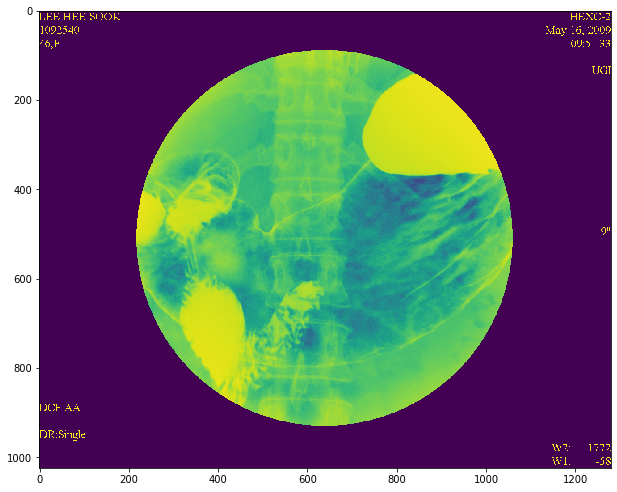

In [16]:
# 결과물
plt.imshow(temp_img)

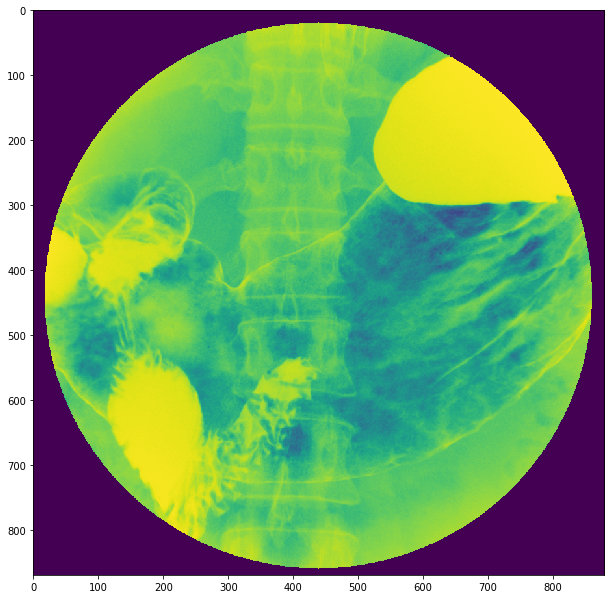

In [17]:
### 그냥 쓸 부분만 자르는 코드
y_start = 70
y_end = 940
x_start = 200
x_end = 1080

temp_img = f_dcm.pixel_array[y_start:y_end,x_start:x_end ]

plt.imshow(temp_img)